In [1]:
import numpy as np
from dom import disturb_boxcar
from equation import sigma_seebeck_zT

In [2]:
data = np.loadtxt('const_dom.csv',delimiter=',')
rand_dist = np.random.rand(10001)

In [3]:
def calculate_disturb(a):
    result = []
    for betai, x1, x2 in data[:,:3]:
        result.append(sigma_seebeck_zT(
            -10, 10, 1/betai, 
            disturb_boxcar(x1, x2, a, rand_dist)
        ))
    return np.vstack(result)

In [4]:
disturb1 = calculate_disturb(.1)
disturb01 = calculate_disturb(.01)
disturb0 = calculate_disturb(0)

e:\Users\Admin\GitProjects\OptimizeTransmission\linear\equation.py:26: IntegrationWarning: The maximum number of subdivisions (50) has been achieved.
  If increasing the limit yields no improvement it is advised to analyze 
  the integrand in order to determine the difficulties.  If the position of a 
  local difficulty can be determined (singularity, discontinuity) one will 
  probably gain from splitting up the interval and calling the integrator 
  on the subranges.  Perhaps a special-purpose integrator should be used.
  return integrate.quad(kernel, x1, x2, args=(j,dom))[0]
e:\Users\Admin\GitProjects\OptimizeTransmission\linear\equation.py:142: RuntimeWarning: invalid value encountered in true_divide
  np.divide(i1, i0),
e:\Users\Admin\GitProjects\OptimizeTransmission\linear\equation.py:143: RuntimeWarning: invalid value encountered in true_divide
  np.divide(i12, ((I(x1,x2,2,dom)+beta)*i0-i12))


In [16]:
print(disturb01[188,2]/disturb0[188,2])
print(disturb1[188,2]/disturb0[188,2])

0.7584501014489338
0.20542136285472282


## plot

In [5]:
import matplotlib.pyplot as plt
from plot import multi_plot

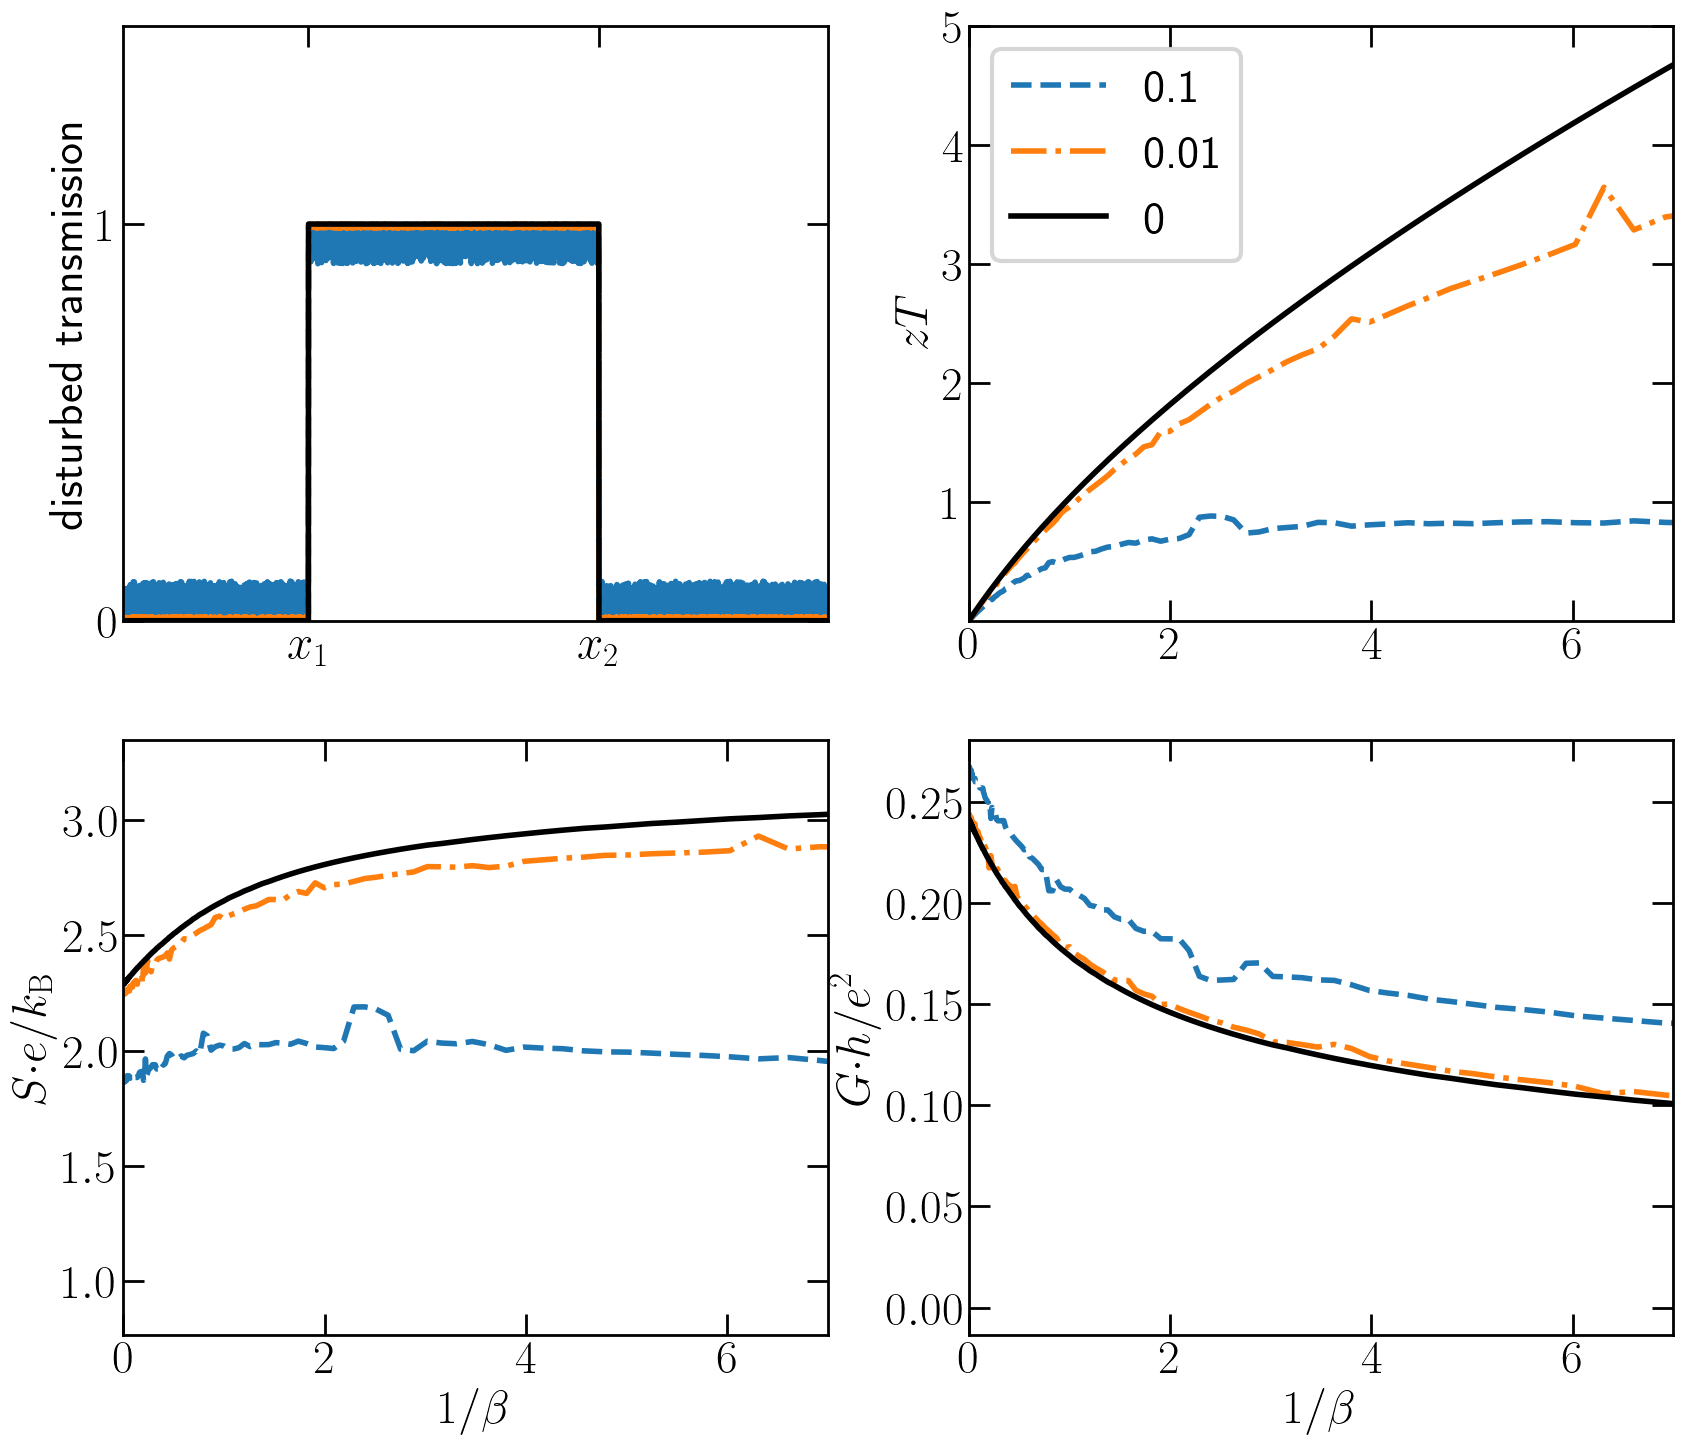

In [11]:
def plot_disturb(axes=None):
    if axes is None:
        axes = plt.subplots(2,2, figsize=(20, 17))
    fig, ((ax0, ax1), (ax2,ax3)) = axes
    data_list = [
        disturb1,
        disturb01,
        disturb0,
    ]
    label_list = [
        0.1,
        .01,
        0,
        # .3,
    ]
    line_style_list = [
        '--',
        '-.',
        'k-',
        # ':',
    ]
    x_range = np.linspace(-10, 10, 10001)
    multi_plot(
        x_range, 
        [disturb_boxcar(2.1, 5.4, a, rand_dist)(x_range) for a in label_list], 
        label_list, line_style_list, (fig, ax0)
    )
    ax0.set_xlim([0, 8])
    ax0.set_xticks([2.1, 5.4])
    ax0.set_xticklabels([r"$x_1$", r"$x_2$"])
    ax0.set_ylim([0,1.5])
    ax0.set_yticks([0., 1.])
    ax0.set_ylabel('disturbed transmission')
    multi_plot(
        data[:,0], 
        [x[:, 2] for x in data_list], 
        label_list, line_style_list, (fig, ax1)
    )
    ax1.set_ylabel(r'$zT$')
    ax1.set_ylim([0,5])
    ax1.set_yticks([1, 2, 3, 4, 5])
    multi_plot(
        data[:,0], 
        [x[:, 1] for x in data_list], 
        label_list, line_style_list, (fig, ax2)
    )
    ax2.set_ylabel(r'$S{\cdot}e/k_\mathrm{B}$')
    ax2.set_xlabel(r'$1/\beta$')
    # ax1.set_ylim([0, 8])
    # ax1.set_yticks([4, 8])
    multi_plot(
        data[:,0], 
        [x[:, 0] for x in data_list], 
        label_list, line_style_list, (fig, ax3)
    )
    ax3.set_ylabel(r'$G{\cdot}h/e^2$')
    # ax2.set_ylim([0, 1])
    # ax2.set_yticks([.2, .4, .6, .8, 1.])
    ax3.set_xlabel(r'$1/\beta$')
    ax1.set_xlim([0,7])
    ax2.set_xlim([0,7])
    ax3.set_xlim([0,7])
    # ax3.set_xticks([])
    # ax3.set_yticks([])
    # ax0.legend('', frameon=False)
    ax0.legend('', frameon=False)
    ax2.legend('', frameon=False)
    ax3.legend('', frameon=False)
    # ax2.legend(fontsize=30)
_ = plot_disturb()